### Team 5 Final Project (ADS500B)

Authors: Lorena Dorado​ and Tysir Shehadey

## Housing Price Prediction

Predicting housing prices and understanding human behavior are essential for advising clients to a successful home buying journey. There are many attributes that are correlated to sale price.

The goal of thie project is to produce data-backed predictions on housing prices for our clients. The team performs exploratory data analysis to understanded the housing features that affect price using python.

The dataset used for this analysis contains details of house sales of King County in Washington State. The data represents houses sold between May 2014 and May 2015. With supervised learning, we can predict home prices based on prior records.

Role: real estate
Modeling Problem: Regression, predicting housing prices (y), independent/exploratory/predictor variables (x, 16 attributes)

## **1. Data Preparation**

Import python libraries to enable analysis, visualization, and machine learning.

In [1]:
# import  standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import numpy as np
import os

# libraries for plotting
import seaborn as sns
sns.set(style='darkgrid',palette="deep")

# libraries for linear regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# libraries for statistical analysis
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error, r2_score

#### **1.1 Import Dataset**
The raw data from Kaggle is imported and prepared for regression modeling.

In [2]:
# create a pandas dataframe from csv
housing_data = pd.read_csv('house_sales.csv', header=0, sep=',')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### **1.2 Clean, wrangle, and handle missing data**

Identify which columns have missing values and determine best method to impute.

In [3]:
# identifying missing values in the 4 columns
housing_data.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### **1.3 Transform data appropriately using aggregation functions**

Impute missing numerical variables with measures of centrality.

In [4]:
impute_columns = ['bedrooms', 'bathrooms','sqft_living', 'sqft_lot']
housing_data[impute_columns].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot
count,20479.000000,20545.000000,20503.000000,2.056900e+04
mean,3.372821,2.113507,2081.073697,1.517982e+04
std,0.930711,0.768913,915.043176,4.148617e+04
min,0.000000,0.000000,290.000000,5.200000e+02
25%,3.000000,1.500000,1430.000000,5.040000e+03
50%,3.000000,2.250000,1920.000000,7.620000e+03
75%,4.000000,2.500000,2550.000000,1.070800e+04
max,33.000000,8.000000,12050.000000,1.651359e+06


In [5]:
# identify outliers
br_outliers = housing_data[(housing_data['bedrooms'] > 30)]
br_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33.0,1.75,1620.0,6000.0,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [6]:
# replace null values of `bedrooms` with the mean of the `bedrooms` column
mean_bed=housing_data['bedrooms'].mean()
housing_data['bedrooms'].replace(np.nan,mean_bed, inplace=True)

# replace null values of `bathrooms` with the mean of the `bathrooms` column
mean_bath=housing_data['bathrooms'].mean()
housing_data['bathrooms'].replace(np.nan,mean_bath, inplace=True)

# replace null values of `sqft_living` with the values of `sqft_living15` column
housing_data['sqft_living'].fillna(housing_data['sqft_living15'], inplace=True)

# replace null values of `sqft_lot` with the values of `sqft_lot15` column
housing_data['sqft_lot'].fillna(housing_data['sqft_lot15'], inplace=True)

# identifying missing values remaining
housing_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### **1.4 Reduce redundant data and perform need-based discretization**

After determining possible correlation, exclude redundant data and determine which variables are relevant to modeling.

In [7]:
# drop columns unneccesary to analysis
housing_data.drop(["id", "sqft_living15","sqft_lot15"], axis = 1, inplace = True)
# housing_data.drop("id", axis = 1, inplace=True)

# drop outliers influencing analysis
housing_data.drop(15870, inplace=True)

## **2. Data Analysis and Visualization**

#### **2.1 Identify categorical, ordinal, and numerical variables within the data**

The variables `waterfront` and `view` are **categorical binary**; `condition` is **categorical ordinal**; and the remaining variables are **numerical**. In this context, `grade` is analyzed as a numerical value.

In [8]:
# remove string from date column
housing_data['date'] = housing_data['date'].str.replace('T000000', '', regex=True)
# convert date column to datetime type
housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data.head()

# identify and convert data types
housing_data['waterfront'] = housing_data['waterfront'].astype('category')
housing_data['view'] = housing_data['view'].astype('category')
housing_data['condition'] = housing_data['condition'].astype('category')

# discrete data is converted to integer
housing_data['bedrooms'] = housing_data['bedrooms'].astype('int64')
housing_data['bathrooms'] = housing_data['bathrooms'].astype('int64')
housing_data['floors'] = housing_data['floors'].astype('int64')
print(housing_data.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living             float64
sqft_lot                float64
floors                    int64
waterfront             category
view                   category
condition              category
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
dtype: object


In [9]:
housing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-10-13,221900.0,3,1,1180.0,5650.0,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,2014-12-09,538000.0,3,2,2570.0,7242.0,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2015-02-25,180000.0,2,1,770.0,10000.0,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2014-12-09,604000.0,4,3,1960.0,5000.0,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,2015-02-18,510000.0,3,2,1680.0,8080.0,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


#### **2.2 Provide measures of centrality and distribution with visualizations**

In [10]:
housing_data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,21612,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,2014-10-29 04:46:26.451971328,5.400835e+05,3.351888,1.760827,2075.502637,1.499538e+04,1.446234,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2014-07-22 00:00:00,3.218375e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.616000e+03,1.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2540.000000,1.062500e+04,2.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,2015-05-27 00:00:00,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000
std,NaN,3.671351e+05,0.887157,0.717282,904.911843,4.075606e+04,0.551898,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829


Distribution of numerical data

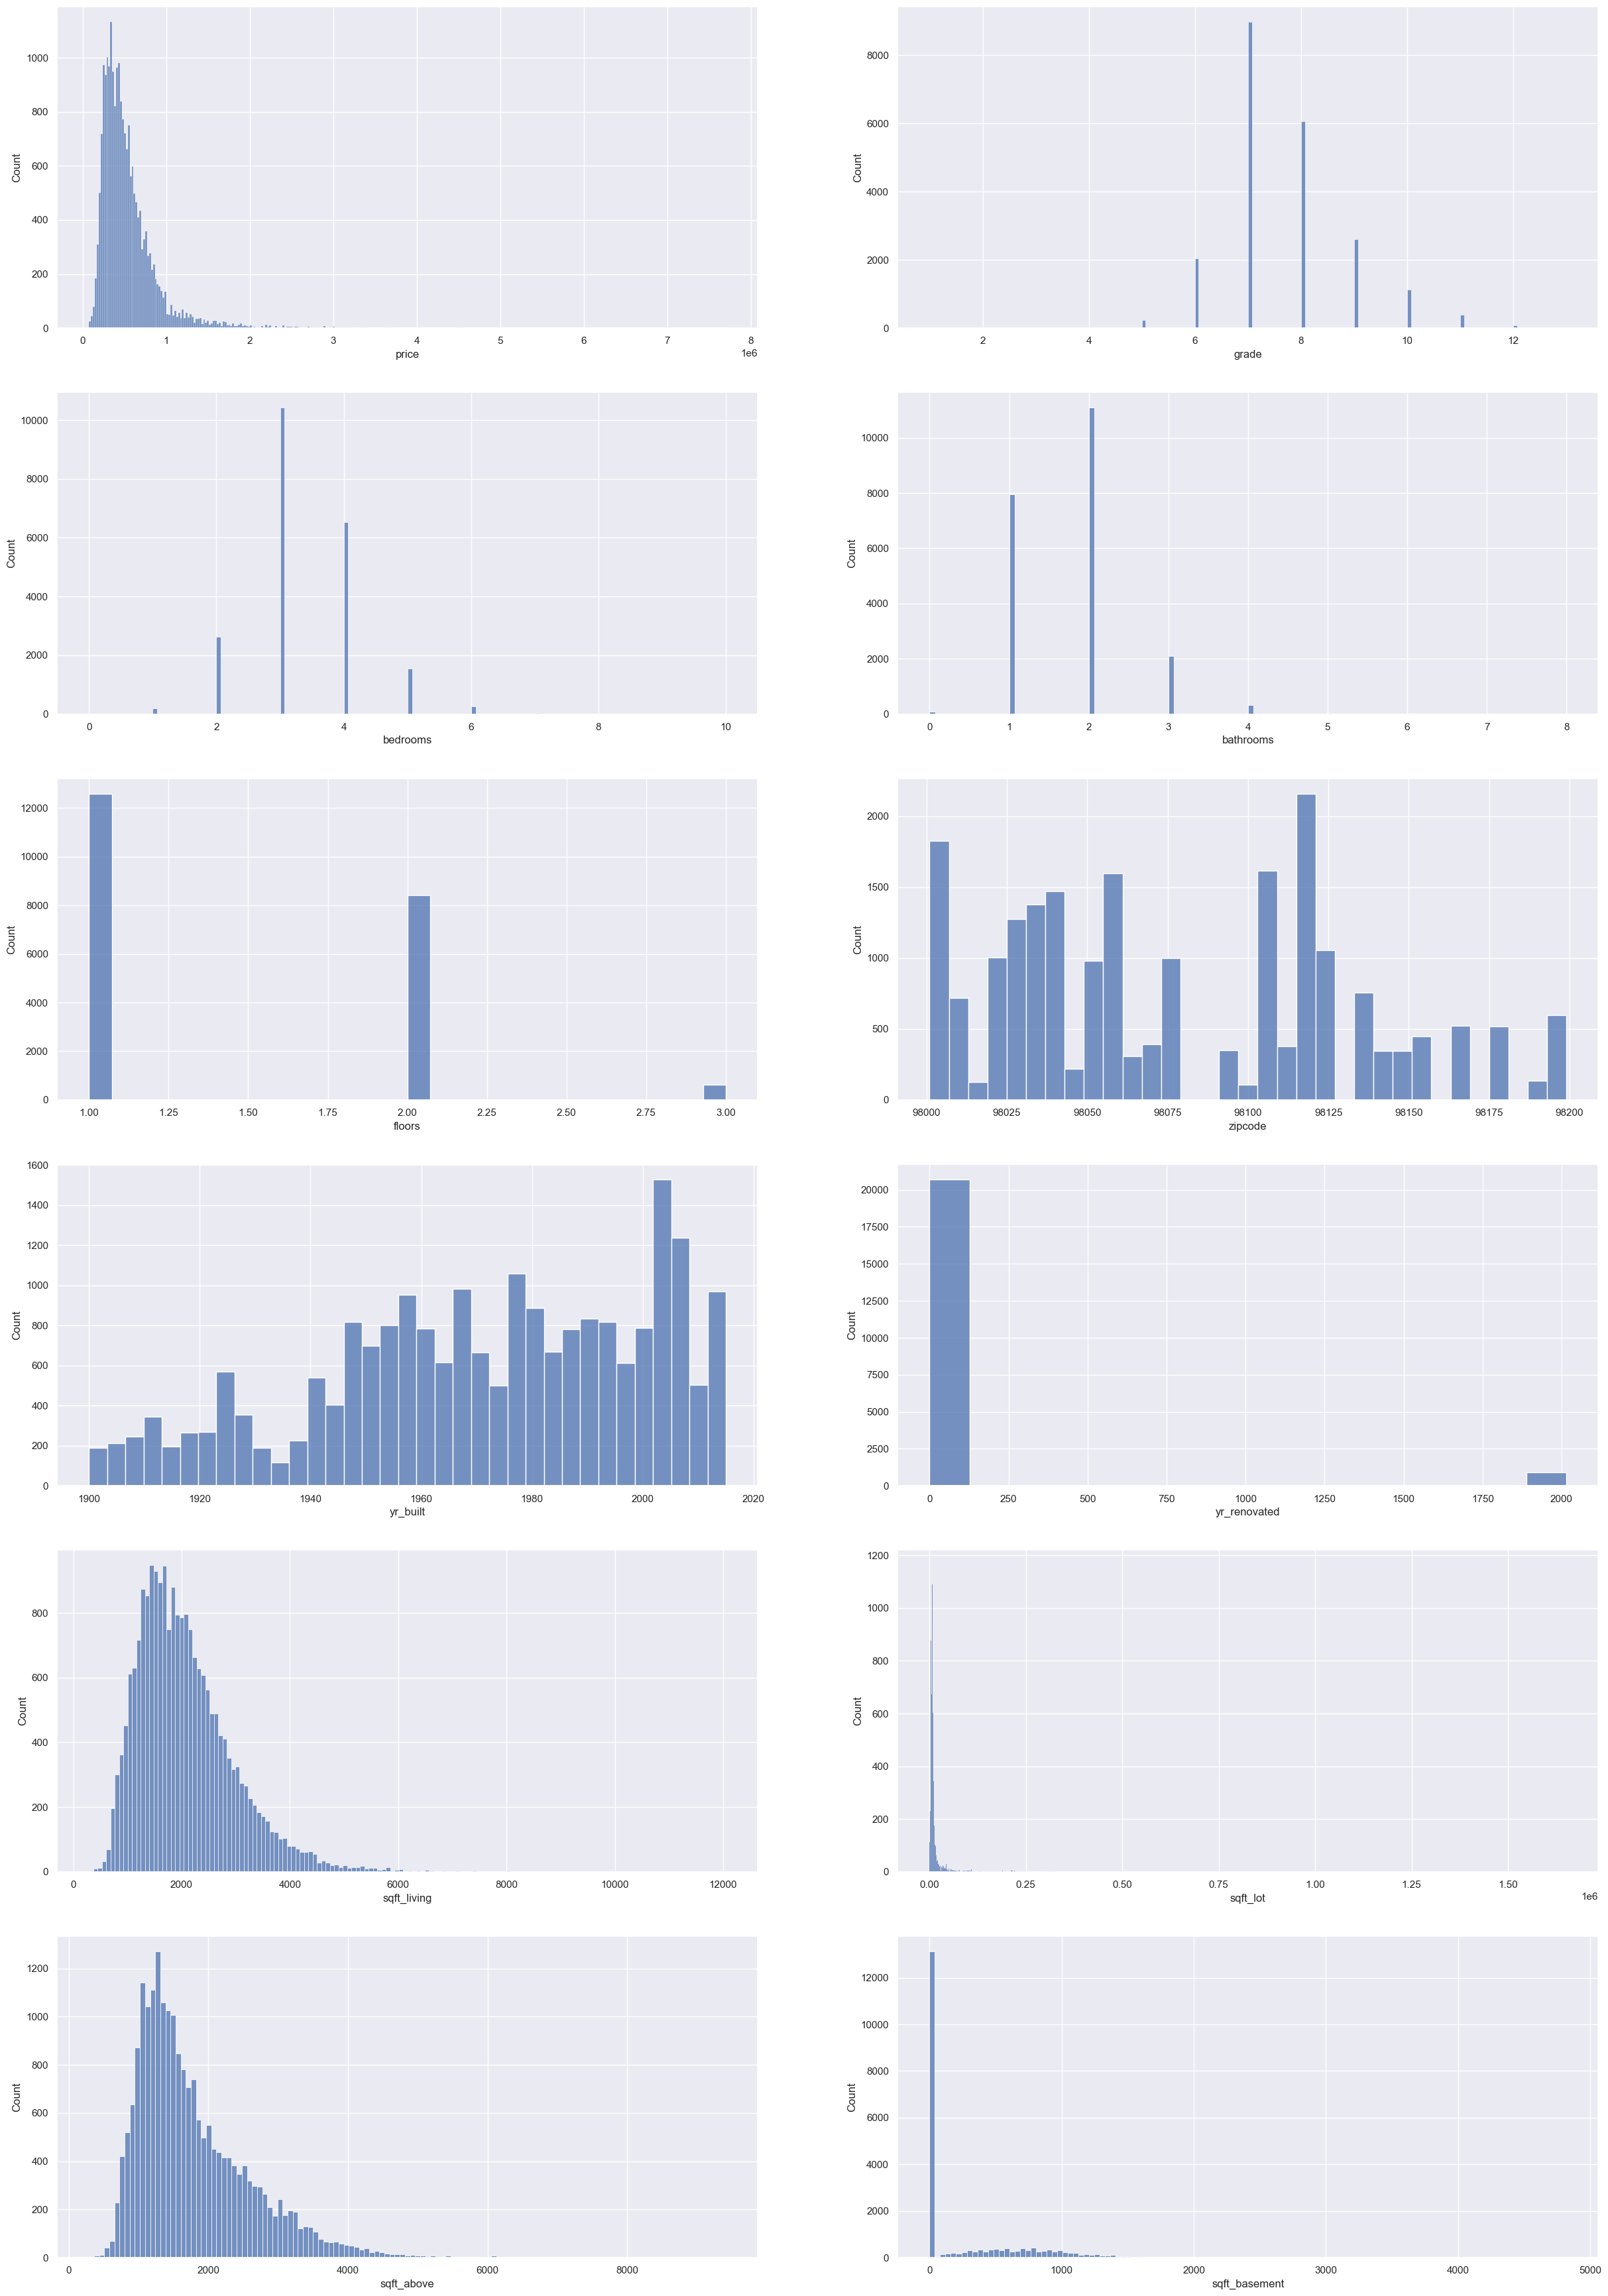

In [11]:
# Create subset for numerical data
numericals = ['price', 'grade', 
            'bedrooms', 'bathrooms', 
            'floors', 'zipcode', 
            'yr_built', 'yr_renovated',
            'sqft_living', 'sqft_lot',
            'sqft_above', 'sqft_basement']

# plot numerical variables
h = plt.figure(figsize=(30,150))
c = 0
for i in numericals:    
    h.add_subplot(20, 2, c+1)
    sns.histplot(housing_data[numericals][i])
    c=c+1
plt.show()

#### **2.3 Diagnose for correlations between variables and determine independent and dependent variables**

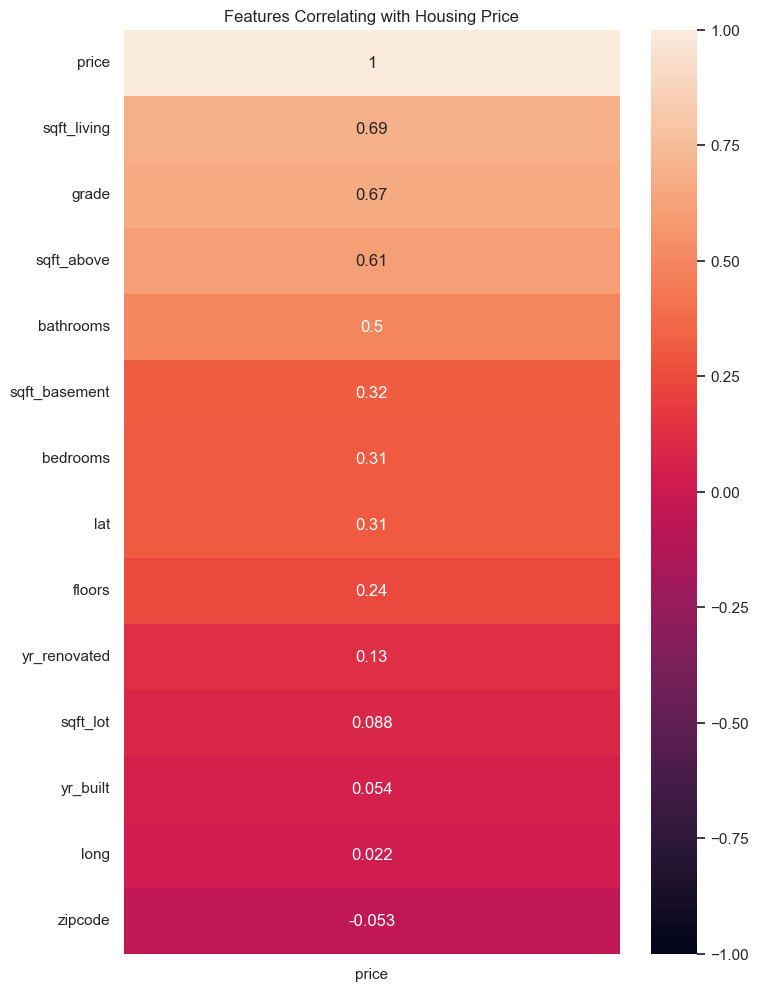

In [28]:
# numeric only
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(
    housing_data.corr(numeric_only=True)[['price']].sort_values(
        by='price', ascending=False),
    vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Housing Price');

Features with moderate correlation: `sqft_living`, `grade`, `sqft_above`, `bathrooms`. 

<Axes: >

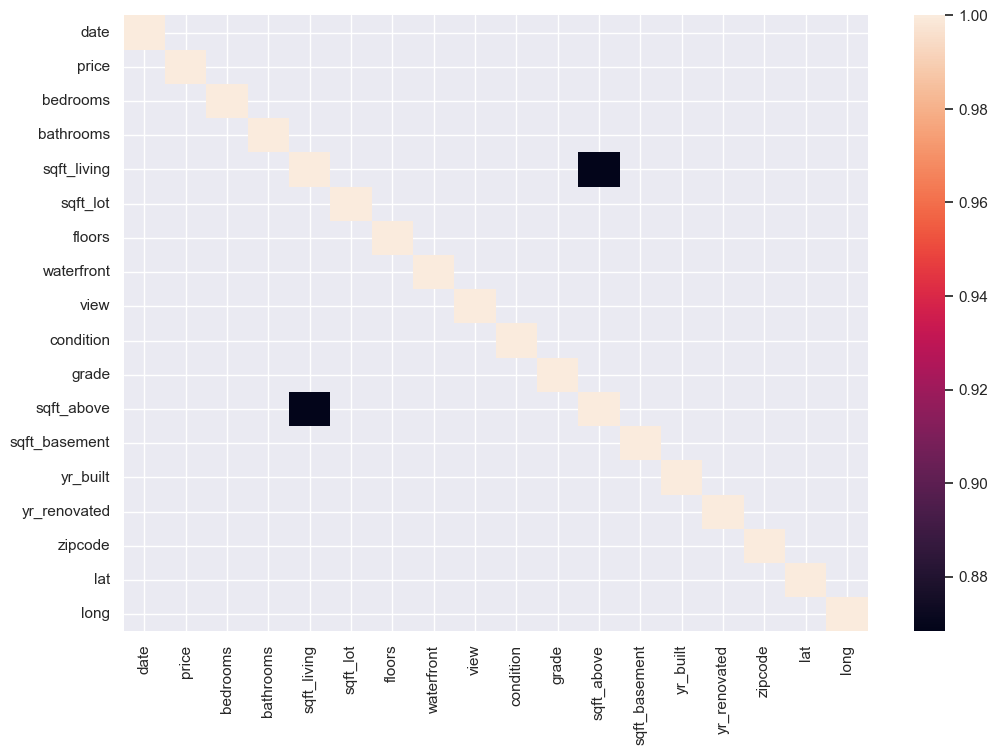

In [13]:
# Identifying high correlations of possible multicollinearity
corr = housing_data.corr()
high_corr = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr)

However, `sqft_above` will be removed for the final model as it may have multicollinearity concerns with `sqft_living`.

#### **2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest**

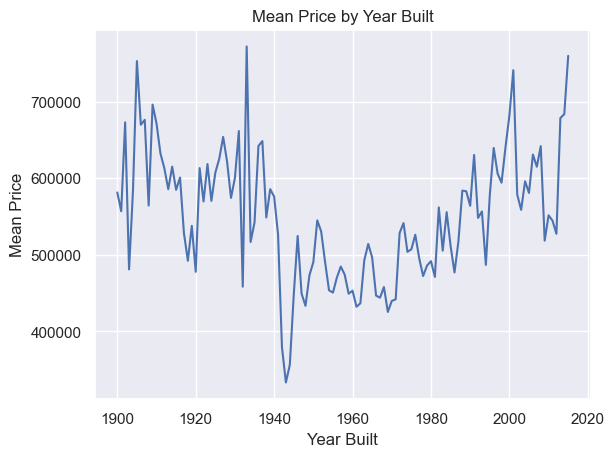

In [14]:
#aggregated the price of houses by the year that they were built
#can provide insight into trends in housing prices based on year built
aggregate = housing_data.groupby('yr_built').agg({'price': 'mean'}).reset_index()
aggregate['price'] = aggregate['price'].round(2)

#checking for trends in the average price of homes based on the year they were built
plt.plot(aggregate['yr_built'], aggregate['price'])
plt.title('Mean Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

**<u>Result</u>:** This graph shows the average price of a home based on the year that the home was built. An important piece of information regarding this graph is that homes can be built in 1900 but undergo renovations over the years and look modern. This is why some of the highest priced housing is from the early 1900s and 1930s. An interesting point on this graph is the price of houses built in the 1940s era. There are many things that can impact this extreme downfall in pricing but it is likely due to WWII. It is assumed the houses from this time were not built well and maybe even turns away newer generations from wanting to renovate them.

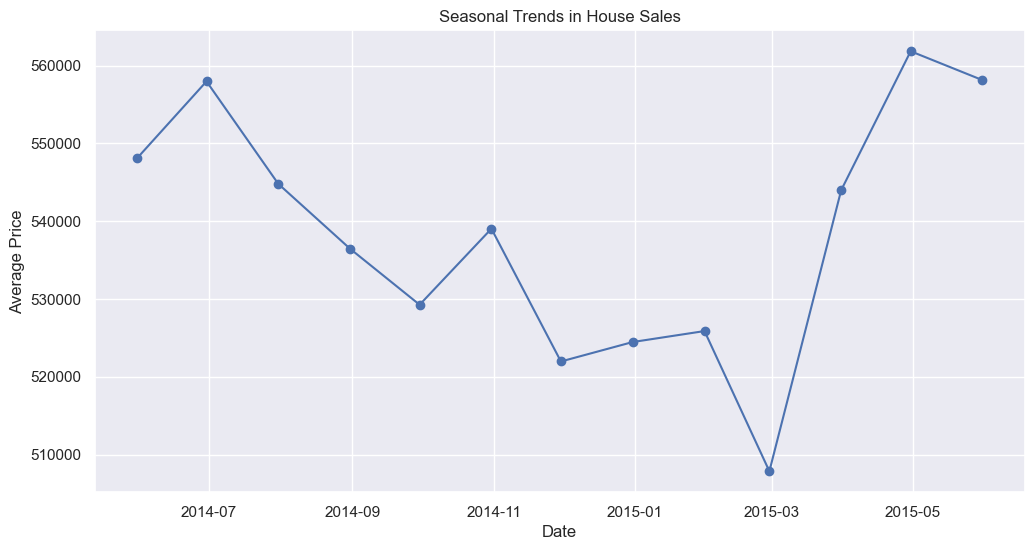

In [15]:
#set the date column as the index
housesales_df = housing_data
housesales_df.set_index('date', inplace=True)

#resample the data by month and calculate the mean price for each month
monthly_trends = housesales_df['price'].resample('M').mean()

#plot the monthly pattern
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends, marker='o', linestyle='-')
plt.title('Seasonal Trends in House Sales')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

**<u>Result</u>:** This graph displays seasonal trends for housing sales based on the average price of the homes sold for the month. This graph shows that the best month to buy homes is in March. Subsequently, the best 'season' to buy homes would be Winter. The three lowest points for the average price of homes sold here is December to March, indicating this to be the best time to purchase a home. More years of house sales data in this area would be beneficial to confirm this trend.

## **3. Data Analytics**

#### **3.1 Supervised Learning Using Linear Regression Model**

Features with moderate correlation: sqft_living, bathrooms,

In [16]:
# predictor variables
housing_features = ['sqft_living', 'grade', 'bathrooms']

# response variable
housing_price = 'price'

# fit a linear regression model to predict 'price' with housing features
Y = housing_data['price']
lm1 = LinearRegression()
lm1.fit(housing_data[housing_features], Y)

print("predicted values: " + str(lm1.predict(housing_data[housing_features])))
print("R^2: " + str(lm1.score(housing_data[housing_features], Y)))

predicted values: [308841.97822029 562454.65408873 134058.31866284 ... 273441.28246998
 492415.11644046 273441.28246998]
R^2: 0.5288042669534234


In [17]:
X1 = sm.add_constant(housing_data[housing_features])
X1_results = OLS(Y,X1).fit()
X1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     8083.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:06:42   Log-Likelihood:            -2.9946e+05
No. Observations:               21612   AIC:                         5.989e+05
Df Residuals:                   21608   BIC:                         5.990e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.218e+05   1.33e+04    -46.732      0.000   -6.48e+05   -5.96e+05
sqft_living   177.4081      3.213     55.212      0.000     171.110     183.706
grade         1.02e+05   2280.155     44.754      0.000    9.76e+04    1.07e+05
bathrooms    7015.3975   3261.023      2.151      0.031     623.552    1.34e+04
==============================================================================
Omnibus:                    17790.742   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1304379.655
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      40.414   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting price using three housing features including `sqft_living`, `grade`, and `bathrooms`.

### Linear Regression on training sets

In [18]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(housing_data[housing_features], Y, test_size=0.25, random_state=1)

# get the shape of train and test sets
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]
X_shape = housing_data[housing_features].shape[0]

# proportion of train and test sets
train_percent = train_shape/X_shape
test_percent = test_shape/X_shape

print('Train Size:', 100*round(train_percent, 2),'%')
print('Test Size:', 100*round(test_percent, 2), '%')

Train Size: 75.0 %
Test Size: 25.0 %


#### **3.2 Train, test, and provide accuracy and evaluation metrics for model results**

In [19]:
# fit a linear regression model to predict 'price' with training dataset
# Y = housing_data['price']
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

Linear Regression is the machine learning algorithim. Specify set (train or test) and specify which variables (x or y).

In [20]:
# apply LR model to make prediction on training set
y_lm2_train_pred = lm2.predict(X_train)

# evaluate performance of LR algorithm
y_lm2_test_pred = lm2.predict(X_test)

In [21]:
# display predictions
y_lm2_train_pred

array([ 731460.24196355,  547000.69536939,  580648.44671806, ...,
        549277.86816986,  456171.51475239, 1080734.7631255 ])

In [22]:
y_lm2_test_pred

array([483327.0167891 , 916160.47339143, 433866.98451384, ...,
       173032.58844142, 767922.47714363, 282475.23534517])

Compare predicted values vs actual values.

In [23]:
# evaluate model performance
y_train

date
2014-07-11     575000.0
2014-10-07     460000.0
2014-06-23     345950.0
2014-11-05     635000.0
2014-05-28     450000.0
                ...    
2014-08-04     571000.0
2014-08-27     380000.0
2015-04-01     650000.0
2014-08-05     437000.0
2014-06-10    1025000.0
Name: price, Length: 16209, dtype: float64

In [24]:
y_lm2_train_pred

array([ 731460.24196355,  547000.69536939,  580648.44671806, ...,
        549277.86816986,  456171.51475239, 1080734.7631255 ])

Comparing predicted and actual values

In [25]:
# compare preidcted and actual train values
lm2_train_mse = mean_squared_error(y_train, y_lm2_train_pred)
print("Mean Squared Error (y-train): ", lm2_train_mse)

# correlation coefficient
lm2_train_r2 = r2_score(y_train, y_lm2_train_pred)
print("R-Squared (y-train): ", lm2_train_r2)

# compare preidcted and actual test values
lm2_test_mse = mean_squared_error(y_test, y_lm2_test_pred)
print("Mean Squared Error (y-test): ", lm2_test_mse)

# correlation coefficient
lm2_test_r2 = r2_score(y_test, y_lm2_test_pred)
print("R-Squared (y-test): ", lm2_test_r2)

Mean Squared Error (y-train):  59849470411.90989
R-Squared (y-train):  0.529634320337875
Mean Squared Error (y-test):  74668193450.15625
R-Squared (y-test):  0.5255291036786489


#### Scatterplot visualization to observe dispersion

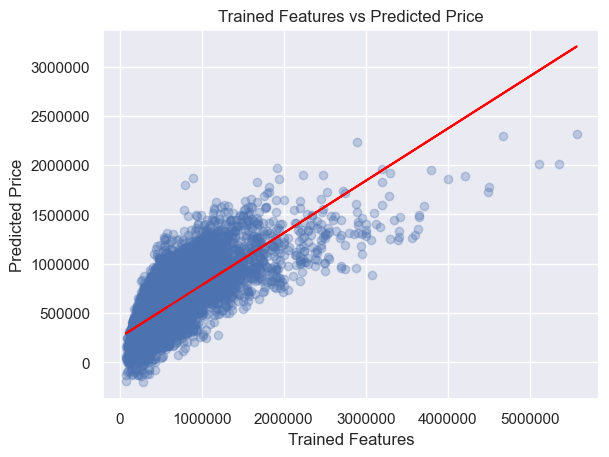

In [26]:
# visualization
plt.scatter(x=y_train, y=y_lm2_train_pred, alpha=0.3)

z = np.polyfit(y_train, y_lm2_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'red')
plt.ylabel('Predicted Price')
plt.xlabel('Trained Features')
plt.title ('Trained Features vs Predicted Price')
plt.ticklabel_format(style='plain')

**<u>Result</u>:** The dispersion is low, signifying good performance.